# Удаление тренда из исходных данных

Рассмотрим нормализацию данных на примере удаления восходящего тренда. Целевыми данными будут случайные значения с средним значением = 0, осложненные восходящим линейным трендом.  
Импортируем нужные библиотеки и инициализируем генератор случайных чисел

In [1]:
from analysis import trends, preprocessing
import grapher
import prng

r = prng.PRNG()
%matplotlib inline

Далее укажем длину последовательности

In [2]:
N = 1000
f = trends.linear(1, 1)
values = [r.uniform(-100, 100) + f(t) for t in range(N)]

Далее скопируем значения в новый массив и применим к ним функцию анти-треда на основе плавающего среднего.

In [3]:
b_values = values.copy()
preprocessing.anti_trend(b_values)

Отобразим полученные массивы на графиках:  
1. График тренда, которым была осложнена функция
2. График значений функции, сложенных с трендом
3. График значений функции после удаления тренда из сырых данных

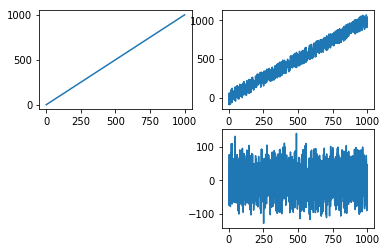

In [4]:
grapher.init(1)
grapher.set_subplot(1, x_arr=[t for t in range(N)],
                    y_arr=[f(t) for t in range(N)])
grapher.set_subplot(2, x_arr=[t for t in range(N)],
                    y_arr=values)
grapher.set_subplot(4, x_arr=[t for t in range(N)],
                    y_arr=b_values)
grapher.show()